In [1]:
import torch

In [2]:
from transformers.tf_exp import ExpScores, ExpSyn

In [3]:
datapath = '../../Datasets/imagenette2/train/n01440764'

In [4]:
model_unit = ("vit_b_16", ".heads.Linearhead", 0)

In [5]:
exp_syn = ExpSyn(model_unit, 'vit_b_16_exp', savedir='tmp_test')

In [6]:
exp_syn.get_syn_images(50, 'tench')

Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050
synth img scores: mean -0.758 +- std 0.000
step 0  time: total 0.10s | GAN visualize 0.01s   Transformers score 0.02s   optimizer step 0.07s
sigma: 2.90
synth img scores: mean -0.489 +- std 0.643
step 1  time: total 0.67s | GAN visualize 0.09s   Transformers score 0.54s   optimizer step 0.04s
sigma: 2.83
synth img scores: mean -0.383 +- std 0.541
step 2  time: total 0.63s | GAN visualize 0.06s   Transformers score 0.51s   optimizer step 0.06s
sigma: 2.76
synth img scores: mean -0.182 +- std 0.584
step 3  time: total 0.76s | GAN visualize 0.06s   Transformers score 0.53s   optimizer step 0.17s
sigma: 2.70
synth img scores: mean 0.139 +- std 0.672
step 4  time: total 0.66s | GAN visualize 0.08s   Tr

In [19]:
syn = exp_syn.average_syn_image()

In [20]:
syn.shape

torch.Size([224, 224, 3])

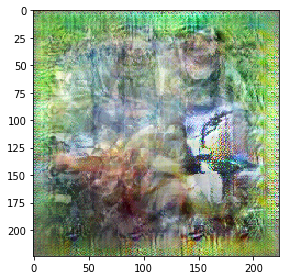

In [24]:
io.imshow(syn.numpy())

In [19]:
from transformers.tf_exp import ExpScores

In [20]:
es = ExpScores(path=datapath, model_unit=model_unit)

In [8]:
from skimage import io

In [13]:
syn = io.imread('/home/paperspace/mlproj2_new/ActMax-Optimizer-Dev/tmp_test/tench/Best_vit_b_16_exp_0.png')

In [14]:
syn.shape

(224, 224, 3)

In [18]:
es.syn_scores(torch.Tensor(syn) / 225.)

10.979037284851074

In [13]:
for i in range(11):
    syn = io.imread('/home/paperspace/mlproj2_new/ActMax-Optimizer-Dev/tmp_test/tench01/Best_vit_b_16_exp_%d.png' % (i))
    imglist.append(syn)

In [15]:
imgs = torch.Tensor([])
for i in range(len(imglist)):
    img = torch.Tensor(imglist[i]).permute((2, 0, 1)).unsqueeze(dim=0)
    imgs = torch.concat([img, imgs])

In [16]:
imgs.shape

torch.Size([21, 3, 224, 224])

In [24]:
average = torch.mean(imgs, axis=0) / 255.
average.shape

torch.Size([3, 224, 224])

In [30]:
es.syn_scores(syn=average.permute((1, 2, 0)))

0.5623115301132202